In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('darkgrid')

In [208]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

fatal: destination path 'Datasets' already exists and is not an empty directory.


In [209]:
df=pd.read_csv('/content/Datasets/Netflix_Titles Dataset/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [210]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [212]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


**Interpretation of `.info()`:**
- We have 7787 entries (titles).
- **Key Problem:** The `date_added` column is of type `object` (a string), not a `datetime` object. We cannot perform time-based analysis until this is corrected.
- **Missing Values:** `director`, `cast`, `country`, `date_added`, and `rating` all have missing values. `director` has the most significant number of nulls.


In [213]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


### Step 3: Data Cleaning and Transformation

This step is critical for ensuring our analysis is accurate. We will handle missing values and correct data types.
#### **Theoretical Concept: Data Type Conversion & Handling Nulls**
Data often comes in non-ideal formats. Storing dates as strings, for example, prevents us from extracting components like the year or month, or from plotting data over time. Converting columns to their proper data types (`pd.to_datetime`, `.astype()`) is a fundamental preprocessing step.

For null values, we have several strategies:
1.  **Drop:** If only a very small percentage of rows have missing data, dropping them might be acceptable (`.dropna()`).
2.  **Fill/Impute:** Replace missing values with a placeholder (like "Unknown") or a statistical measure (like the mode for categorical data). This is useful when you don't want to lose the other information in those rows.

In [214]:
# 1. Handle missing values in 'director' and 'cast'
# Since these are text fields and many are missing, we'll fill them with 'Unknown'.

# we can use inplace=true also or use df['column']=
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

**WHY unknown??**

Now , we know that in pvs class for categorical we filled with mode , but supposedly the mode is rohit shetty....but we have diff movies like japanese, sweden, hollywood for all of those we can't put rohit shetty and also the has_director concept fails here because the name of director also holds importance....therefore all together we are creating a diff category of unknown

In [215]:
df['country'].value_counts()

,count
country,
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183
...,...
"Germany, United States, United Kingdom, Canada",1
"Peru, United States, United Kingdom",1
"Saudi Arabia, United Arab Emirates",1


**Understanding why mode works here and the unknown concept fails**

As seen above , what happens is that if we go for top 5 countries currently includes USA, India, UK, Japan, South Korea

If we put Unknown as a category which holds a count of 507 it would hamper the reputation of other countries coming above UK and other countries as well also when shown for analysis it seems unprofessional for not handling that well enough.

Now, as we see USA already leads with a huge number from India so including more 500 to it won't make more changes in the data and would maintain the uniformity in the data.. thus we go with that.

In [216]:
# 2. Handle missing 'country'
# We'll fill with the mode, which is the most common country.
mode = df['country'].mode()[0]
df['country'] = df['country'].fillna(mode)

In [217]:
# 3. Drop the few rows with missing 'date_added' and 'rating'
# Since the number is small (less than 0.2% of data), dropping them is a safe option.
df.dropna(subset=['date_added', 'rating'], inplace=True)

**NOTE**

We have two diff functions **drop** and **dropna**

drop is for entire column and dropna which removes only the null values

In [218]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [219]:
# 4. Convert 'date_added' to datetime objects
# Use format='mixed' to handle potential variations in date formats
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', dayfirst=False)

In [220]:
df['date_added']

,date_added
0,2020-08-14
1,2016-12-23
2,2018-12-20
3,2017-11-16
4,2020-01-01
...,...
7782,2020-10-19
7783,2019-03-02
7784,2020-09-25
7785,2020-10-31


* **format='mixed':** This argument tells pandas to infer the date format automatically. This is helpful when the date strings in the column have different formats.

* **dayfirst=False:** This argument specifies that when the date format is ambiguous (e.g., 01/02/2023), it should be interpreted as month first (January 2nd) rather than day first (February 1st).


We did this coversion so that we can extract year separately and month separately.


In [221]:
# 5. Create new features for year and month added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [222]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


### Step 4: Exploratory Data Analysis & Visualization

#### 4.1 What is the distribution of content type?

In [223]:
type_counts=df['type'].value_counts()
print(type_counts)
print(type_counts.index)

type
Movie      5372
TV Show    2398
Name: count, dtype: int64
Index(['Movie', 'TV Show'], dtype='object', name='type')


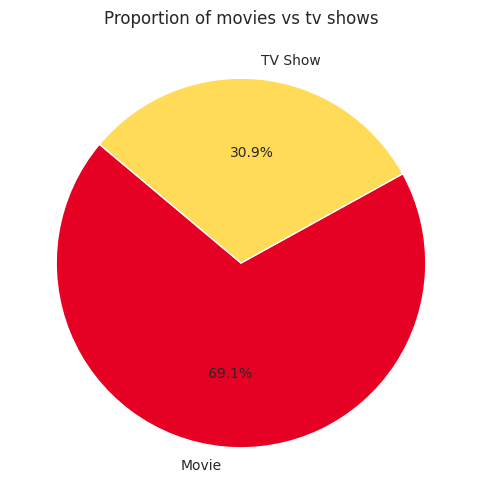

In [224]:
plt.figure(figsize=(8,6))
plt.pie(type_counts,labels=type_counts.index,autopct='%1.1f%%', startangle=140, colors=['#e60023', '#FFDB58'])
#autopct shows it can have only one decimal value after point
plt.title('Proportion of movies vs tv shows')
plt.show()

**Insight:** The Netflix library is dominated by Movies, which make up roughly 70% of the content in this dataset.

#### 4.2 How has content been added over time?

In [225]:
df.groupby(['year_added','type']).size()

year_added  type   
2008        Movie         1
            TV Show       1
2009        Movie         2
2010        Movie         1
2011        Movie        13
2012        Movie         3
2013        Movie         6
            TV Show       5
2014        Movie        19
            TV Show       6
2015        Movie        58
            TV Show      30
2016        Movie       256
            TV Show     184
2017        Movie       861
            TV Show     361
2018        Movie      1255
            TV Show     429
2019        Movie      1497
            TV Show     656
2020        Movie      1312
            TV Show     697
2021        Movie        88
            TV Show      29
dtype: int64

In [226]:
df.groupby(['year_added','type']).size().unstack()

type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,NaN
2010,1.0,NaN
2011,13.0,NaN
2012,3.0,NaN
2013,6.0,5.0
2014,19.0,6.0
2015,58.0,30.0
2016,256.0,184.0


In [227]:
#handle null values and store this in a diff df so it can be plotted easily in next step

content_over_year=df.groupby(['year_added','type']).size().unstack().fillna(0)
content_over_year

type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,0.0
2010,1.0,0.0
2011,13.0,0.0
2012,3.0,0.0
2013,6.0,5.0
2014,19.0,6.0
2015,58.0,30.0
2016,256.0,184.0


<Figure size 1200x800 with 0 Axes>

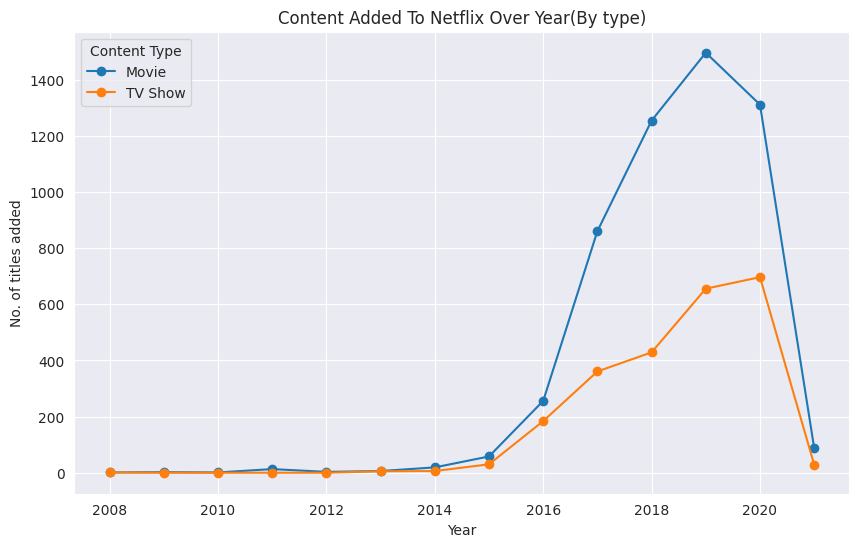

In [228]:
plt.figure(figsize=(12,8))
content_over_year.plot(kind='line',marker='o',figsize=(10,6))
plt.title('Content Added To Netflix Over Year(By type)')
plt.xlabel('Year')
plt.ylabel('No. of titles added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()


**kind='line'**	Creates a line chart

**marker='o'**	Puts circle markers on each data point

**figsize=(10,6)**	Figure size for this plot(overrides the previous one)

plt.title()----Adds a main title to the plot
plt.xlabel---- X-axis
plt.ylabel----Y-axis
plt.legend----Shows legend for: Movie, TV Show---This helps identify which line is which
plt.grid(True)-----Adds background grid lines
plt.show()---displays graph

**Insight:** By separating movies and TV shows, we can see that while both grew significantly, the addition of movies accelerated much more dramatically, peaking in 2019. The growth in TV shows has been more steady. There appears to be a slight slowdown in content additions in 2020 and 2021, which could be due to the COVID-19 pandemic affecting productions or the dataset being incomplete for the latest year.

#### 4.3 What are the most popular genres?

In [229]:
df['listed_in']

,listed_in
0,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,"Dramas, International Movies"
2,"Horror Movies, International Movies"
3,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Dramas
...,...
7782,"Dramas, International Movies"
7783,"Dramas, International Movies, Music & Musicals"
7784,"Documentaries, International Movies, Music & M..."
7785,"International TV Shows, Reality TV"


#### **Theoretical Concept: Handling Multi-Value Text Columns**
The `listed_in` column contains strings with multiple genres separated by commas (e.g., "Dramas, International Movies"). To analyze each genre individually, we need to transform the data. A common technique is to:
1.  **Split** the string in each row into a list of genres.
2.  **Explode** the DataFrame so that each genre in the list gets its own row, duplicating the other information for that title.
This allows us to perform a `value_counts()` on the genres.

In [230]:
df['listed_in'].str.split(', ')

,listed_in
0,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
1,"[Dramas, International Movies]"
2,"[Horror Movies, International Movies]"
3,"[Action & Adventure, Independent Movies, Sci-F..."
4,[Dramas]
...,...
7782,"[Dramas, International Movies]"
7783,"[Dramas, International Movies, Music & Musicals]"
7784,"[Documentaries, International Movies, Music & ..."
7785,"[International TV Shows, Reality TV]"


In [231]:
genres=df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')

#A new column genre is created--genre
#now i have assigned this dataframe to a completely new dTataframe called genres

In [232]:
genres

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,International TV Shows
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Dramas
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Sci-Fi & Fantasy
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Dramas
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,Music & Musicals
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,International TV Shows
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,Reality TV
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3,Documentaries


In [233]:
#now easily we can get count of each genre using value_counts

#directly it can be done---but learning some new features as well like setting index/number and also renaming columns
#top_genre_counts=genres['genre'].value_counts()
#top_genre_counts.head(15)

top_genre_counts=genres['genre'].value_counts().reset_index()
top_genre_counts.columns=['Genre','Count']
top_genre_counts

,Genre,Count
0,International Movies,2437
1,Dramas,2105
2,Comedies,1471
3,International TV Shows,1197
4,Documentaries,786
5,Action & Adventure,721
6,TV Dramas,703
7,Independent Movies,673
8,Children & Family Movies,532
9,Romantic Movies,531


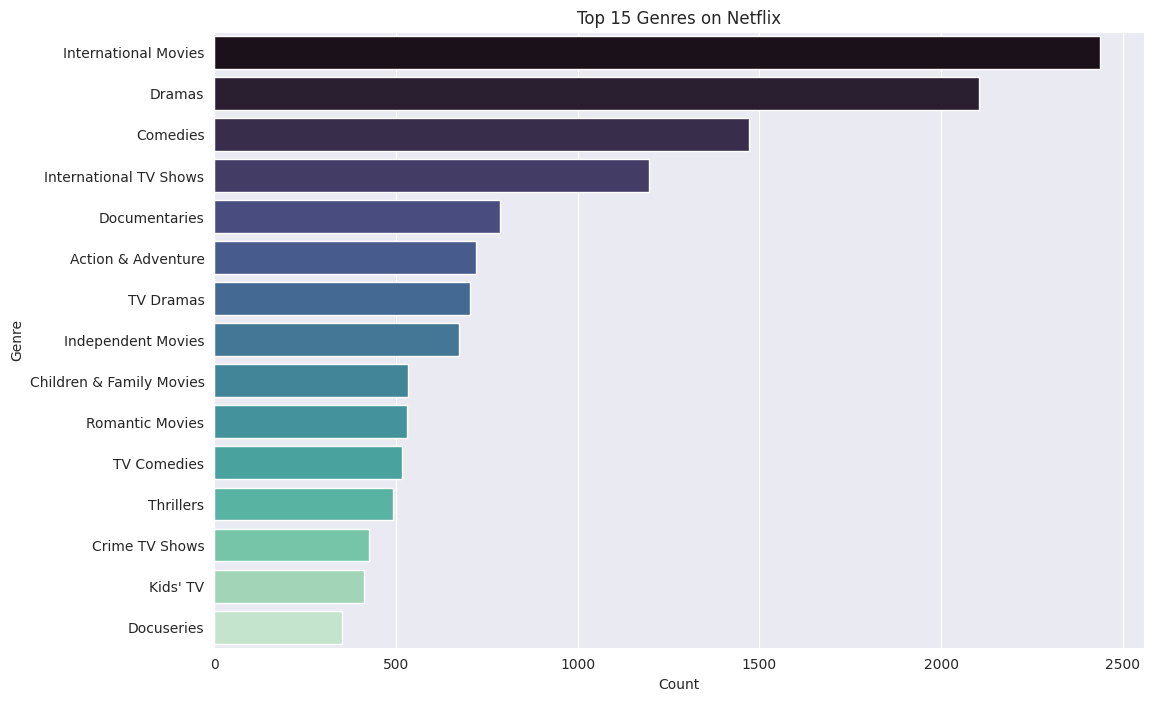

In [234]:
top_genre_counts_plot=top_genre_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='Genre', x='Count', data=top_genre_counts_plot, palette='mako', hue='Genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

🔁 How palette and hue work together

hue decides WHAT gets different colors
palette decides WHICH colors are used

So in your case:

hue='Genre' → each genre is a different color

palette='mako' → colors come from the mako palette

Other common palettes:

'viridis'

'rocket'

'coolwarm'

'Set2'

'pastel'

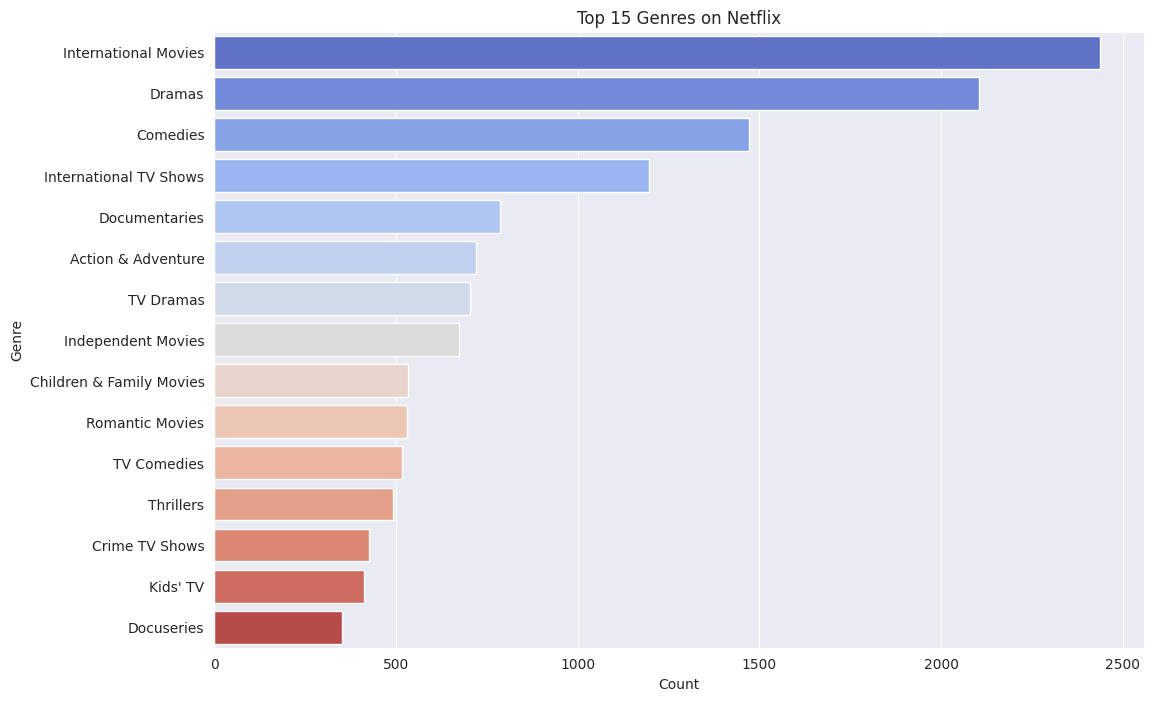

In [235]:

plt.figure(figsize=(12, 8))
sns.barplot(y='Genre', x='Count', data=top_genre_counts_plot, palette='coolwarm', hue='Genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

**Insight:** "International Movies" is the most common genre tag, highlighting Netflix's global content strategy. This is followed by Dramas, Comedies, and Action & Adventure.

#### 4.4 What is the distribution of content duration?

In [236]:
# Separate movies and TV shows
movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

In [237]:
# Clean and convert duration for movies
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Clean and convert duration for TV shows
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

In [238]:
movies_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_min
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,78
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,80
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,123
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,6,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,88
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,10,99
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,111
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,44


In [239]:
tv_shows_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,seasons
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,4
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1
11,s12,TV Show,1983,Unknown,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018,11,1
12,s13,TV Show,1994,Diego Enrique Osorno,Unknown,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019,5,1
16,s17,TV Show,Feb-09,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",United States,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016,12,1
7775,s7776,TV Show,Zoids Wild,Unknown,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,2020-08-14,2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,2020,8,1
7777,s7778,TV Show,Zombie Dumb,Unknown,Unknown,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,7,2
7779,s7780,TV Show,Zona Rosa,Unknown,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,2019-11-26,2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,2019,11,1


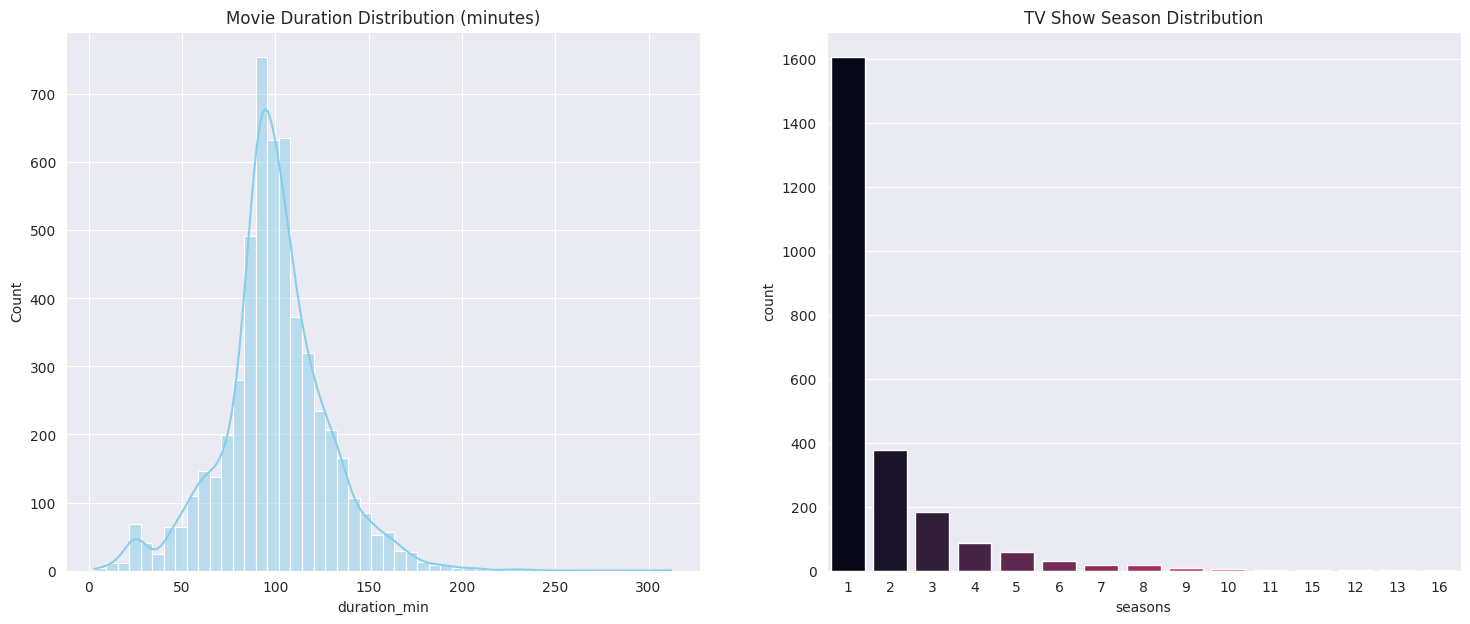

In [240]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

Difference between shallow copy and deep copy

A shallow copy creates a new object but shares nested data, so changes inside affect the original, whereas a deep copy creates everything new, so no changes affect the original.

**Insight:**
- The majority of movies on Netflix are between 80 and 120 minutes long, which is standard for feature films.
- The vast majority of TV shows on Netflix are short-lived, with most having only 1 season. This could reflect a strategy of producing many pilots and only renewing the most successful ones, or a focus on limited series.

#### 4.5 Where does the content come from? (Geographical Analysis)

In [241]:
# Handle the multi-country listings similar to genres
countries = df.assign(country=df['country'].str.split(', ')).explode('country')

In [242]:
# Get the top 15 countries and their counts
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity

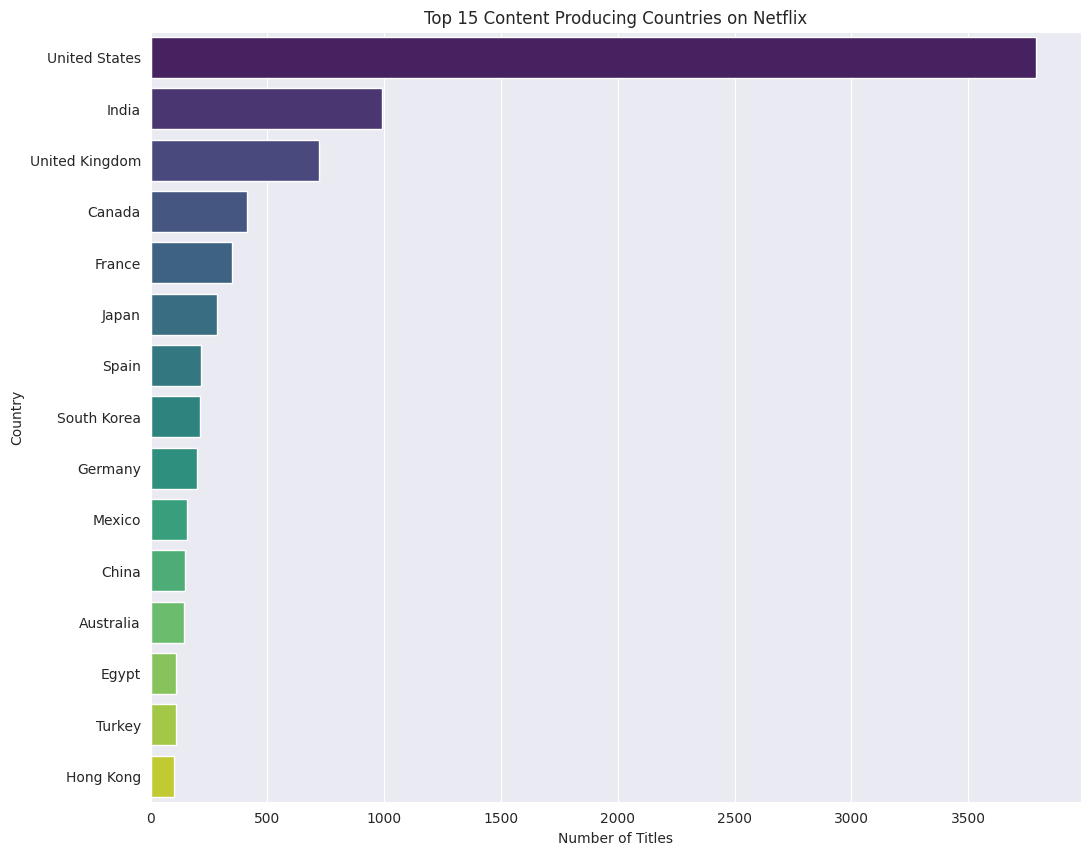

In [243]:
# Select only the top 15 for plotting
top_countries_counts_plot = top_countries_counts.head(15)

plt.figure(figsize=(12, 10))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

**Insight:** The United States is by far the largest producer of content available on Netflix. However, India is a very strong second, which explains why so many of the top actors were from India. The UK, Japan, and South Korea also represent major content markets for the platform, emphasizing its global nature.

#### 4.6 What are the maturity ratings of the content?

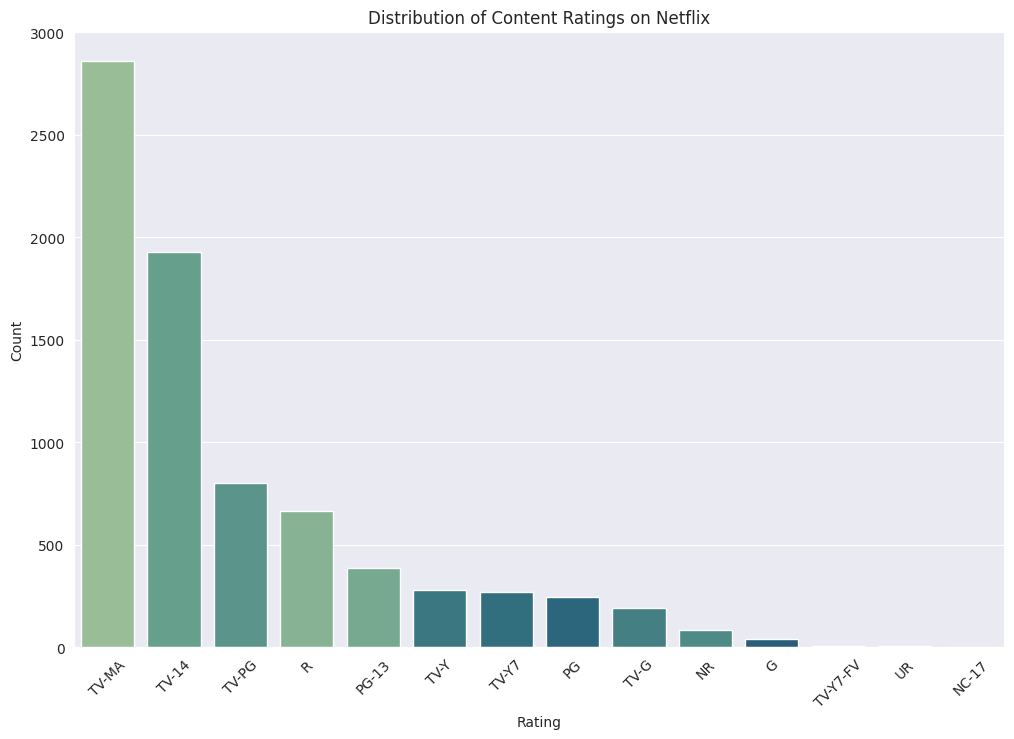

In [244]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Insight:** A large portion of Netflix's content is aimed at mature audiences, with `TV-MA` (Mature Audience) and `TV-14` (Parents Strongly Cautioned) being the two most common ratings. This suggests a focus on adult viewers over content for children (`TV-G`, `TV-Y`).

### Step 5: Feature Engineering - Content Freshness
Let's create a new feature to analyze how old content is when it gets added to Netflix. This can tell us about their acquisition strategy (buying old classics vs. releasing new originals).

In [245]:
# Create the 'age_on_netflix' feature
df['age_on_netflix'] = df['year_added'] - df['release_year']
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_on_netflix
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,7
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,8
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,12


In [246]:
# Filter out any potential errors where added_year is before release_year
content_age = df[df['age_on_netflix'] >= 0]

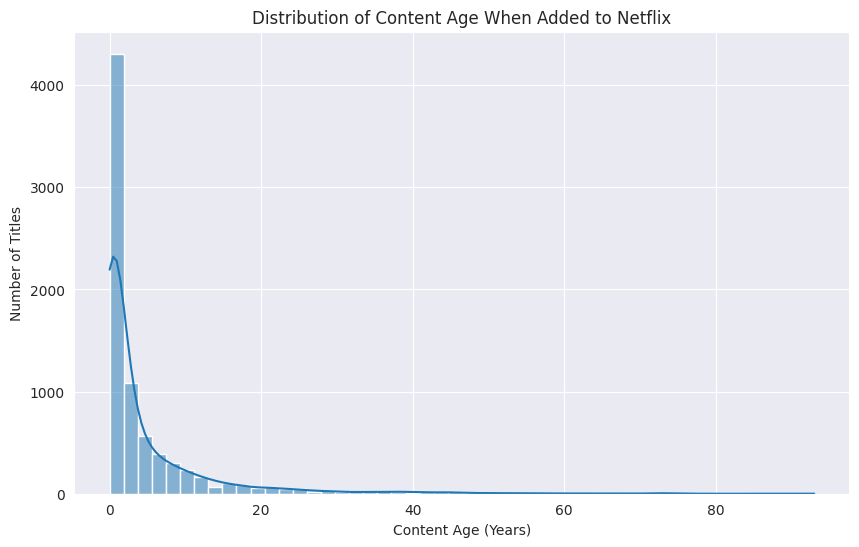

In [247]:
plt.figure(figsize=(10, 6))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

**Insight:** The large spike at `0` indicates that a significant amount of content is added in the same year it's released, which is characteristic of "Netflix Originals." However, there is a very long tail, showing that Netflix also heavily invests in acquiring licensed content that can be decades old, building a deep library of classic films and shows.

### Step 6: Deeper Multivariate Analysis

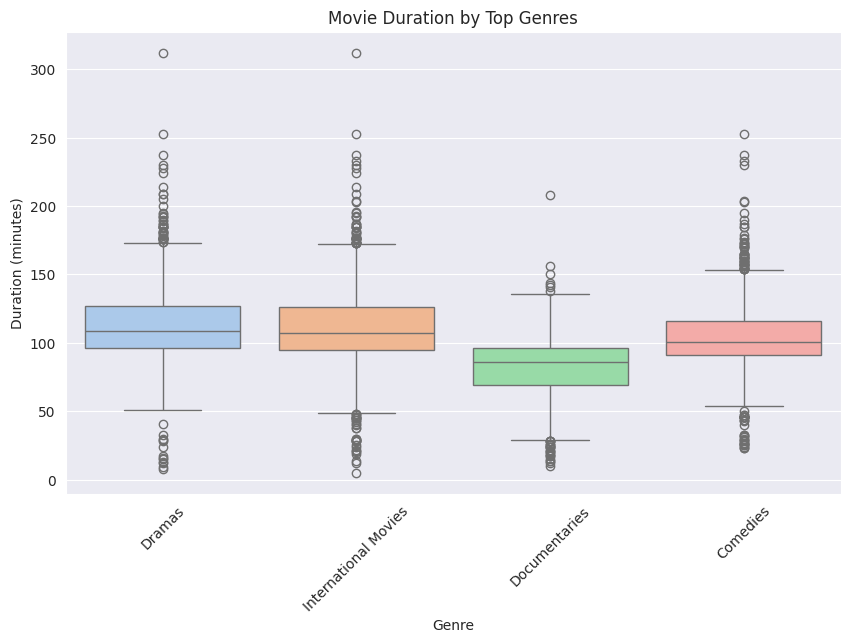

In [248]:
# Analyze movie duration across different top genres

top_genres = genres['genre'].value_counts().index[:5]
#genres['genre'] → selects the genre column
#value_counts() → counts how many times each genre appears
#.index → gets the genre names
#[:5] → selects the top 5 most frequent genre

genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
#genres['type'] == 'Movie'
#→ keep only movies
#genres['genre'].isin(top_genres)
#→ keep only rows where genre is in top 5 genres
#&
#→ both conditions must be true
#.copy()
#→ creates a shallow copy to safely modify data (avoids warnings)

genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(10, 6))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

### Step 7: Word Cloud from Content Descriptions
As a final visual analysis, let's generate a word cloud from the `description` column to see what themes and words are most common in Netflix content.

In [249]:
df['description']

,description
0,In a future where the elite inhabit an island ...
1,After a devastating earthquake hits Mexico Cit...
2,"When an army recruit is found dead, his fellow..."
3,"In a postapocalyptic world, rag-doll robots hi..."
4,A brilliant group of students become card-coun...
...,...
7782,When Lebanon's Civil War deprives Zozo of his ...
7783,A scrappy but poor boy worms his way into a ty...
7784,"In this documentary, South African rapper Nast..."
7785,Dessert wizard Adriano Zumbo looks for the nex...


In [250]:
# Combine all descriptions into a single string
text = ' '.join(df['description'])
text

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive. When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that\'s haunting their jungle island training camp. In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group. A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack. A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect. After an awful accident, a couple admitted to a grisly hospital are separated and must find each other to escape — before 

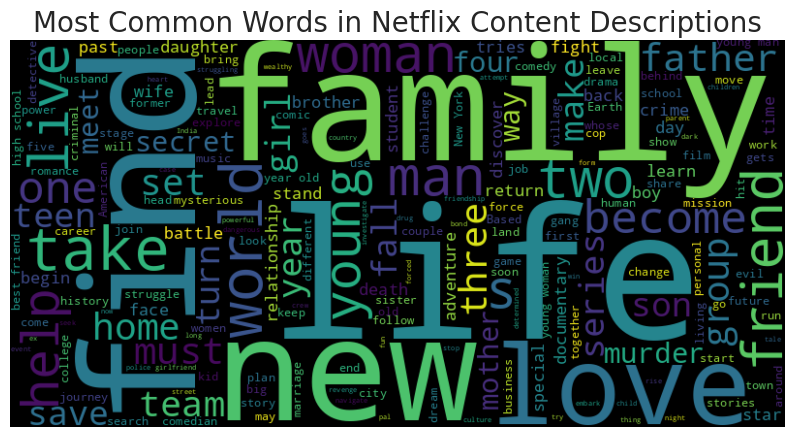

In [251]:
# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

**Insight:** The word cloud highlights common themes and subjects. Words like "life," "family," "love," "young," "friends," and "world" are prominent, suggesting that much of the content revolves around human relationships and personal journeys. Action-oriented words like "find," "secret," and "new" also appear frequently.

### Step 8: Final Conclusion and Summary of Insights

This in-depth EDA of the Netflix dataset has revealed several key characteristics and strategies of the platform's content library.

**Key Findings:**
1. **Content Strategy:** Netflix's library is movie-heavy (~70%), and the platform aggressively added content between 2016-2019. Their strategy involves a mix of brand new originals (added the same year they are released) and a deep library of licensed older content.
2. **Global Dominance:** While the US is the top content producer, the platform is heavily international, with India being a massive contributor. This is reflected in the top genres ("International Movies") and most frequent actors.
3. **Target Audience:** The content library is skewed towards mature audiences, with `TV-MA` and `TV-14` being the most common ratings.
4. **Content Format & Genre:** Dramas and Comedies are universally popular genres. Most movies stick to a standard 90-120 minute runtime, while the vast majority of TV shows only last for a single season, suggesting a high-risk, high-reward approach to series production.
5. **Common Themes:** Descriptions of content frequently revolve around universal themes of life, family, love, and discovery.

**Limitations:** This dataset is a snapshot in time and lacks viewership data. Therefore, our analysis is of the *supply* of content, not its *demand* or popularity. Nonetheless, this EDA provides a strong, multi-faceted understanding of the composition and evolution of the Netflix library.

# Submission Q's

* How has the distribution of content ratings changed over time?
* Is there a relationship between content age and its type (Movie vs. TV Show)?
* Can we identify any trends in content production based on the release year vs. the year added to Netflix?
* What are the most common word pairs or phrases in content descriptions?
* Who are the top directors on Netflix?

How has the distribution of content ratings changed over time?

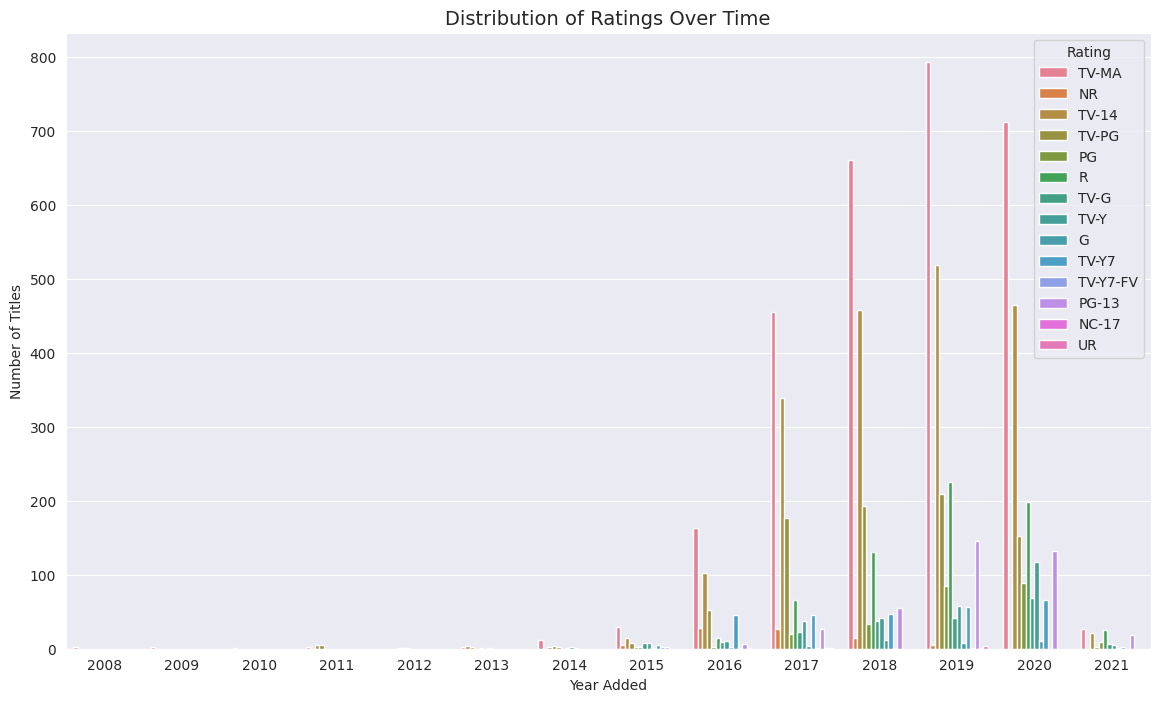

In [252]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='year_added', hue='rating')

plt.title('Distribution of Ratings Over Time', fontsize=14)
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Rating')
plt.show()






Since the above plot doesn't look much clearer, we will plot it differently for movies and tv_shows

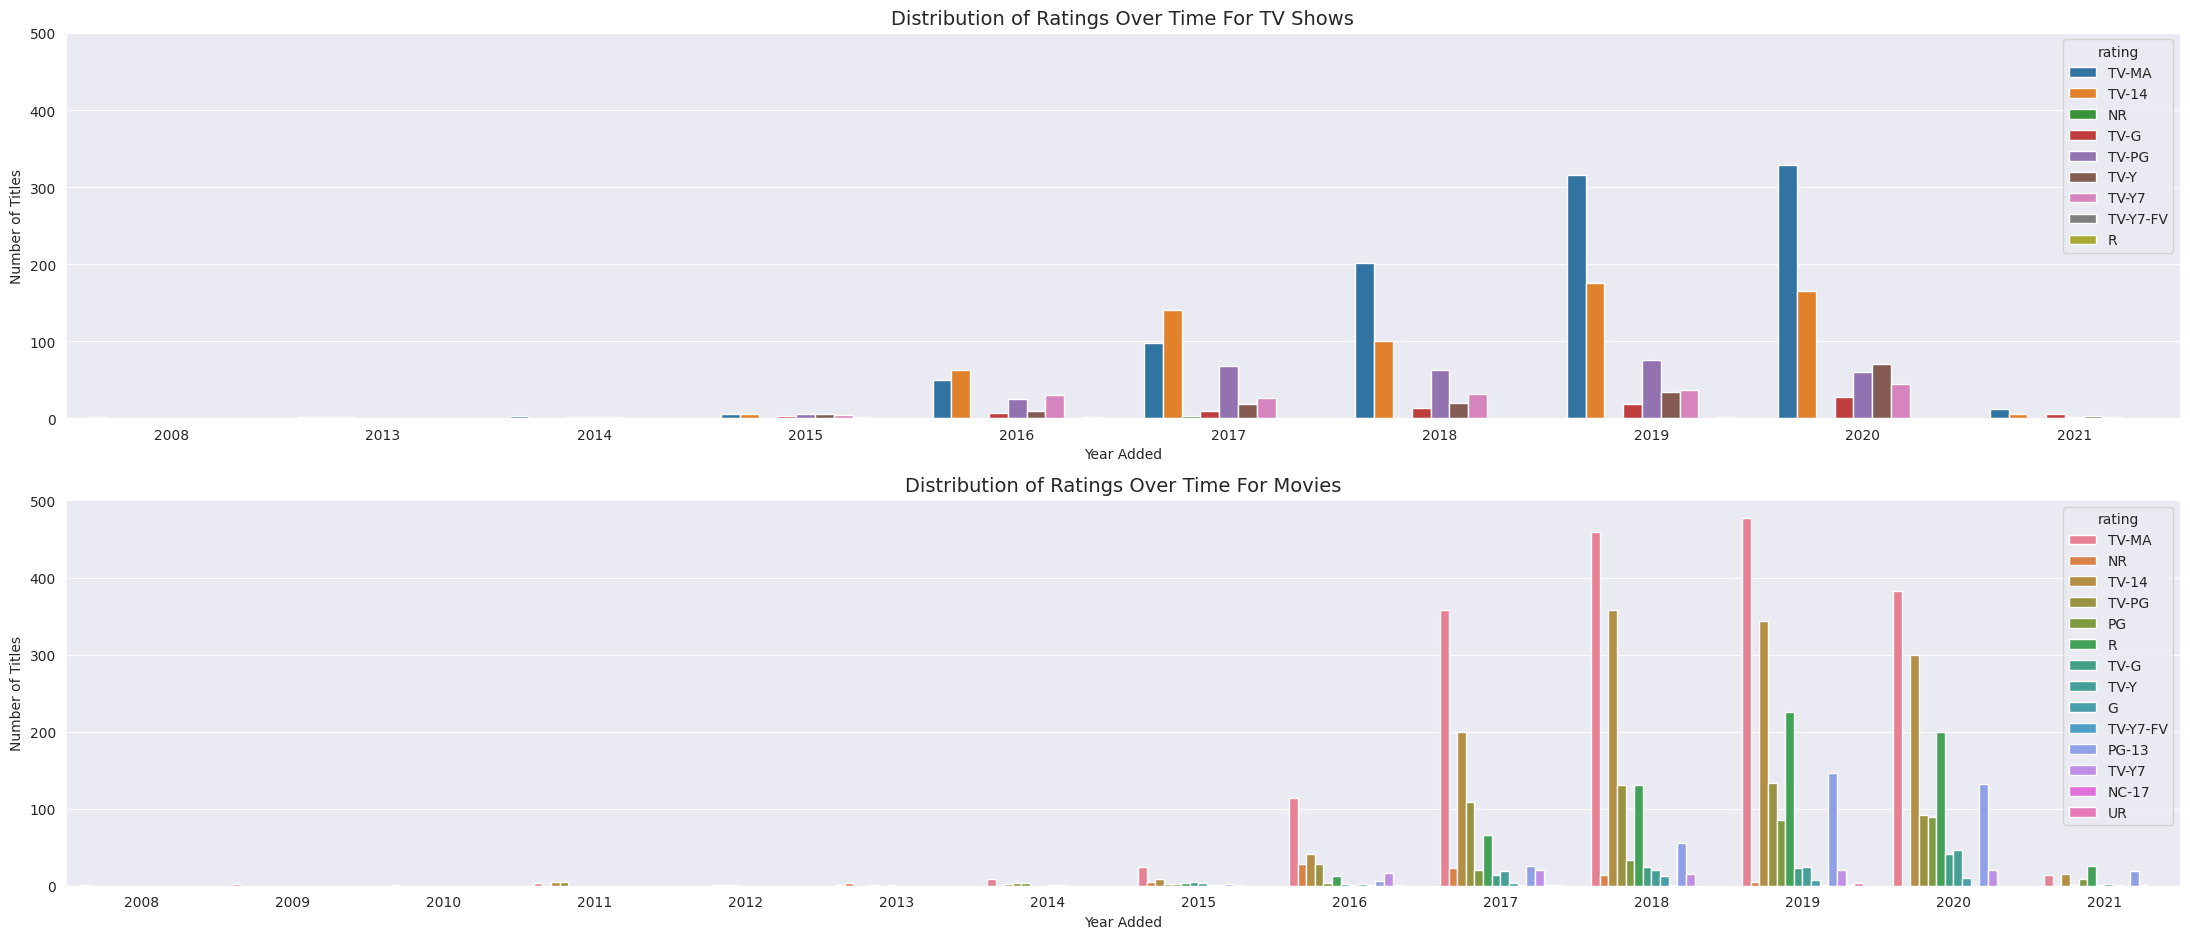

In [253]:

fig, axes = plt.subplots(2, 1, figsize=(22,10),sharey=True)


sns.countplot(ax=axes[0],data=tv_shows_df, x='year_added', hue='rating',legend=True)

axes[0].set_title('Distribution of Ratings Over Time For TV Shows', fontsize=14)
axes[0].set_xlabel('Year Added')
axes[0].set_ylabel('Number of Titles')
#axes[0].set_legend(title='Rating')


sns.countplot(ax=axes[1],data=movies_df, x='year_added', hue='rating',legend=True)

axes[1].set_title('Distribution of Ratings Over Time For Movies', fontsize=14)
axes[1].set_xlabel('Year Added')
axes[1].set_ylabel('Number of Titles')
#axes[1].set_legend(title='Rating')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Netflix content additions increased after 2015, peaking around 2019–2020.

Mature ratings (TV-MA, TV-14) dominate both TV shows and movies.

Movies contribute higher content volume than TV shows, driving most of the growth.

Kids and family ratings (TV-Y, G, PG) are consistently present but form a small share of total content.

Overall, Netflix’s strategy has shifted toward adult-oriented, high-volume content while maintaining limited rating diversity.

Is there a relationship between content age and its type (Movie vs. TV Show)?

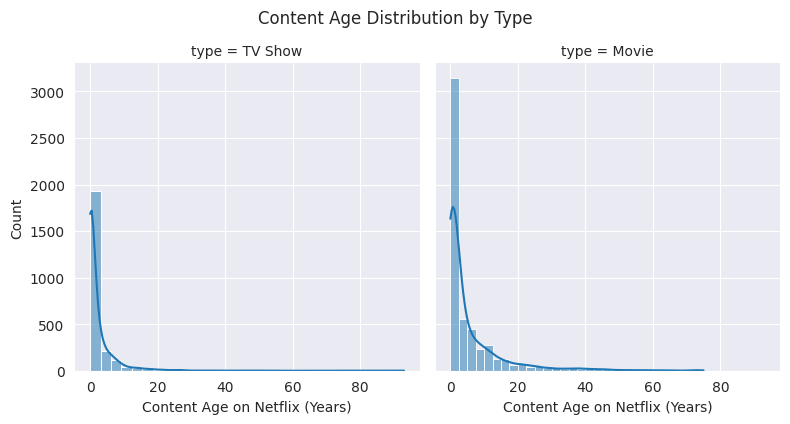

In [254]:
g = sns.FacetGrid(content_age, col='type', sharey=True, height=4)
g.map(sns.histplot, 'age_on_netflix', bins=30, kde=True)
g.set_axis_labels('Content Age on Netflix (Years)', 'Count')
g.fig.suptitle('Content Age Distribution by Type', y=1.05)
plt.show()



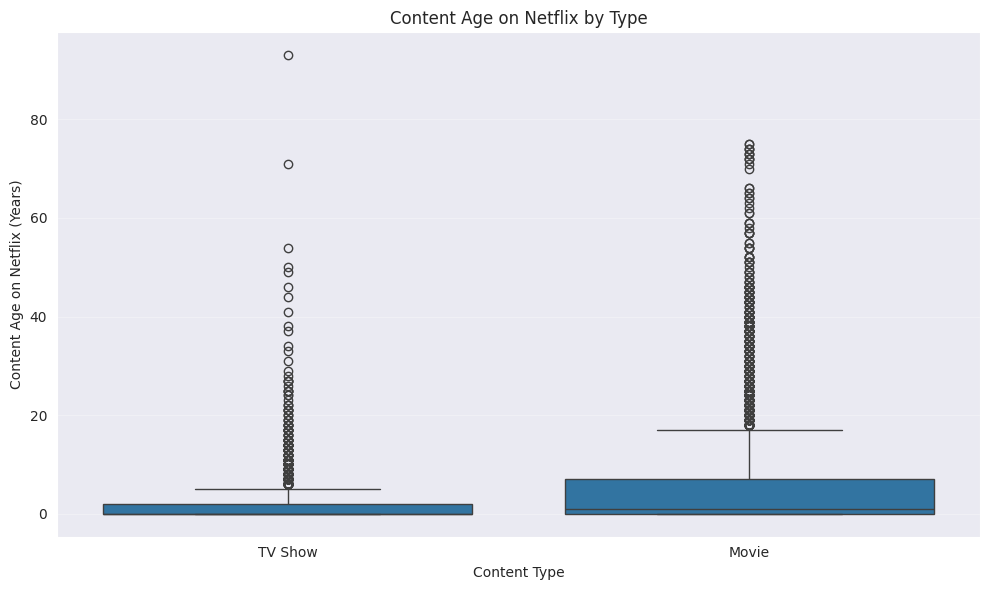

In [255]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=content_age,
    x='type',
    y='age_on_netflix',

)

plt.title('Content Age on Netflix by Type')
plt.xlabel('Content Type')
plt.ylabel('Content Age on Netflix (Years)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Relationship Between Content Age & Type

TV Shows are usually newer when added to Netflix, as seen by the tall bars near 0–5 years.

Movies span a wider age range, meaning Netflix adds both new and very old movies.

Both distributions are right-skewed, showing Netflix prefers recent content, with fewer old titles.

Older content (20+ years) is far more common among movies than TV shows.

TV shows have less variation in age, suggesting faster acquisition after release.

Movies show higher variability and more outliers, reflecting inclusion of classic films.

Can we identify any trends in content production based on the release year vs. the year added to Netflix?

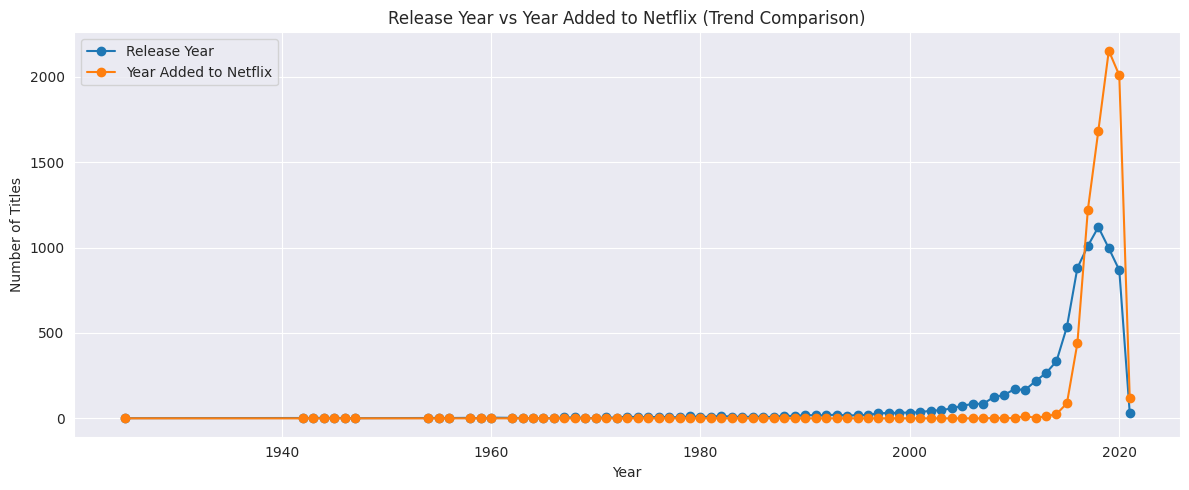

In [256]:
release_counts = df['release_year'].value_counts().sort_index()
added_counts = df['year_added'].value_counts().sort_index()

year_trend = (
    pd.DataFrame({
        'Release Year': release_counts,
        'Year Added to Netflix': added_counts
    })
    .fillna(0)
)

plt.figure(figsize=(12, 5))

plt.plot(year_trend.index, year_trend['Release Year'],
         marker='o', label='Release Year')

plt.plot(year_trend.index, year_trend['Year Added to Netflix'],
         marker='o', label='Year Added to Netflix')

plt.title('Release Year vs Year Added to Netflix (Trend Comparison)')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





In [257]:
# -------------------- Movies --------------------
movie_release = movies_df['release_year'].value_counts().sort_index()
movie_added = movies_df['year_added'].value_counts().sort_index()

movie_trend = (
    pd.DataFrame({
        'Release Year': movie_release,
        'Year Added to Netflix': movie_added
    })
    .fillna(0)
)
movie_trend

,Release Year,Year Added to Netflix
1942,2,0.0
1943,3,0.0
1944,3,0.0
1945,3,0.0
1946,1,0.0
...,...,...
2017,742,861.0
2018,734,1255.0
2019,582,1497.0
2020,411,1312.0


In [258]:
# -------------------- TV Shows --------------------
tv_release = tv_shows_df['release_year'].value_counts().sort_index()
tv_added = tv_shows_df['year_added'].value_counts().sort_index()

tv_trend = (
    pd.DataFrame({
        'Release Year': tv_release,
        'Year Added to Netflix': tv_added
    })
    .fillna(0)
)
tv_trend

,Release Year,Year Added to Netflix
1925,1,0.0
1946,1,0.0
1963,1,0.0
1967,1,0.0
1968,1,0.0
1972,1,0.0
1974,1,0.0
1977,1,0.0
1979,1,0.0
1981,1,0.0


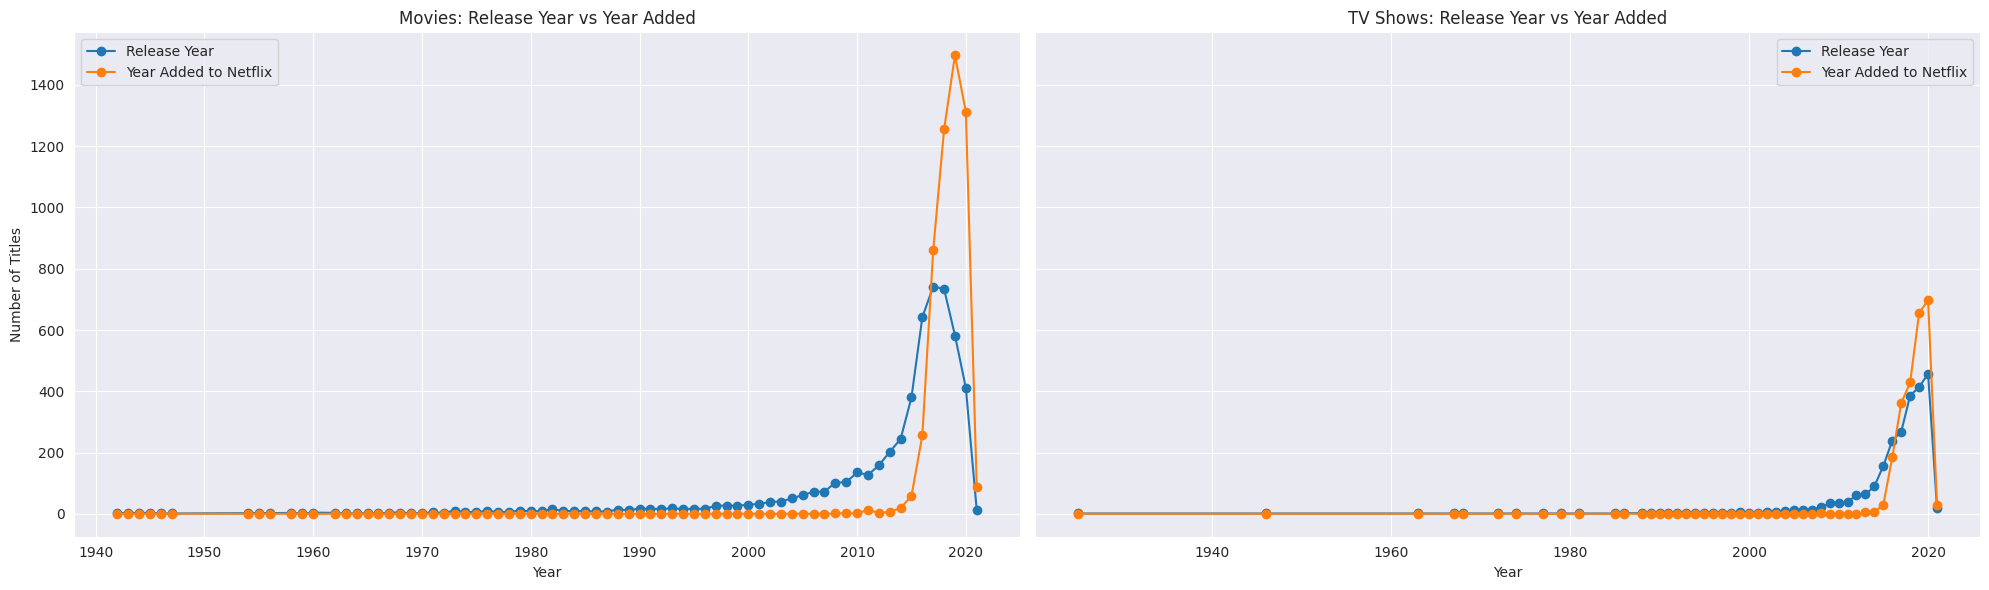

In [259]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

#-----Plot for Movies-------#
axes[0].plot(
    movie_trend.index, movie_trend['Release Year'],
    marker='o', label='Release Year'
)
axes[0].plot(
    movie_trend.index, movie_trend['Year Added to Netflix'],
    marker='o', label='Year Added to Netflix'
)

axes[0].set_title('Movies: Release Year vs Year Added')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Titles')
axes[0].legend()
axes[0].grid(True)

#-----Plot for TV Shows-------#
axes[1].plot(
    tv_trend.index, tv_trend['Release Year'],
    marker='o', label='Release Year'
)
axes[1].plot(
    tv_trend.index, tv_trend['Year Added to Netflix'],
    marker='o', label='Year Added to Netflix'
)

axes[1].set_title('TV Shows: Release Year vs Year Added')
axes[1].set_xlabel('Year')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


**Insights that can be drawn**

Content production and Netflix additions both increase sharply after 2000, with the most significant growth occurring after 2015, reflecting the global streaming boom.

Movies show a noticeable gap between release year and year added, indicating that Netflix frequently acquired older movies rather than only newly released ones.

TV shows exhibit much closer alignment between release year and year added, suggesting that shows are typically added soon after release, often as originals or exclusives.

The gap between release and addition narrows in recent years for both content types, highlighting Netflix’s shift toward faster acquisition of new content.

Peak additions around 2018–2020 are stronger for movies, showing Netflix’s aggressive expansion of its movie catalog during this period.

What are the most common word pairs or phrases in content descriptions?

In [260]:
df['description']

,description
0,In a future where the elite inhabit an island ...
1,After a devastating earthquake hits Mexico Cit...
2,"When an army recruit is found dead, his fellow..."
3,"In a postapocalyptic world, rag-doll robots hi..."
4,A brilliant group of students become card-coun...
...,...
7782,When Lebanon's Civil War deprives Zozo of his ...
7783,A scrappy but poor boy worms his way into a ty...
7784,"In this documentary, South African rapper Nast..."
7785,Dessert wizard Adriano Zumbo looks for the nex...


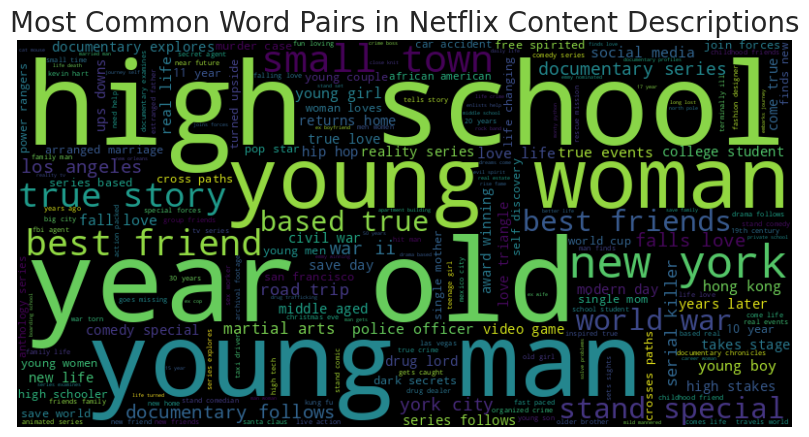

In [261]:
# Import CountVectorizer from scikit-learn's feature_extraction.text module.
# CountVectorizer is used to convert a collection of text documents to a matrix
# of token counts. In this case, it will help us count the occurrences of
# word pairs (bigrams) in the content descriptions.
from sklearn.feature_extraction.text import CountVectorizer

descriptions=df['description'].dropna()

# Use CountVectorizer to extract bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(descriptions)

# Sum up the counts for each bigram across all descriptions.
# .sum(axis=0) sums the counts column-wise (for each bigram).
# .A1 converts the resulting matrix to a 1D numpy array.
bigram_counts = X.sum(axis=0).A1

# Create a dictionary where keys are the bigram phrases and values are their total counts.
bigram_freq = dict(zip(vectorizer.get_feature_names_out(), bigram_counts))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud from bigram frequencies
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black'
).generate_from_frequencies(bigram_freq)

# Display the generated image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Word Pairs in Netflix Content Descriptions', fontsize=20)
plt.show()



Who are the top directors on Netflix?

In [262]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'age_on_netflix'],
      dtype='object')

In [263]:
df['director'].value_counts()

,count
director,
Unknown,2376
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
...,...
John Trengove,1
Jonathan Helpert,1
Jacob Schwab,1


In [264]:
directors_filtered = df[df['director'] != 'Unknown']
directors_filtered

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_on_netflix
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,7
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,8
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,12
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018-07-01,2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,2018,7,0
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,14
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,10,15
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,4


In [265]:
# Split multiple directors, explode into rows
directors = (
    directors_filtered['director']
    .str.split(',')
    .explode()
    .str.strip()
)

# Count directors and convert to DataFrame
top_directors = (
    directors.value_counts()
    .reset_index()


)

top_directors.columns=['director','count']
top_directors=top_directors.head(20)
top_directors


,director,count
0,Jan Suter,21
1,Raúl Campos,19
2,Marcus Raboy,16
3,Jay Karas,15
4,Cathy Garcia-Molina,13
5,Martin Scorsese,12
6,Youssef Chahine,12
7,Jay Chapman,12
8,Steven Spielberg,10
9,Anurag Kashyap,9


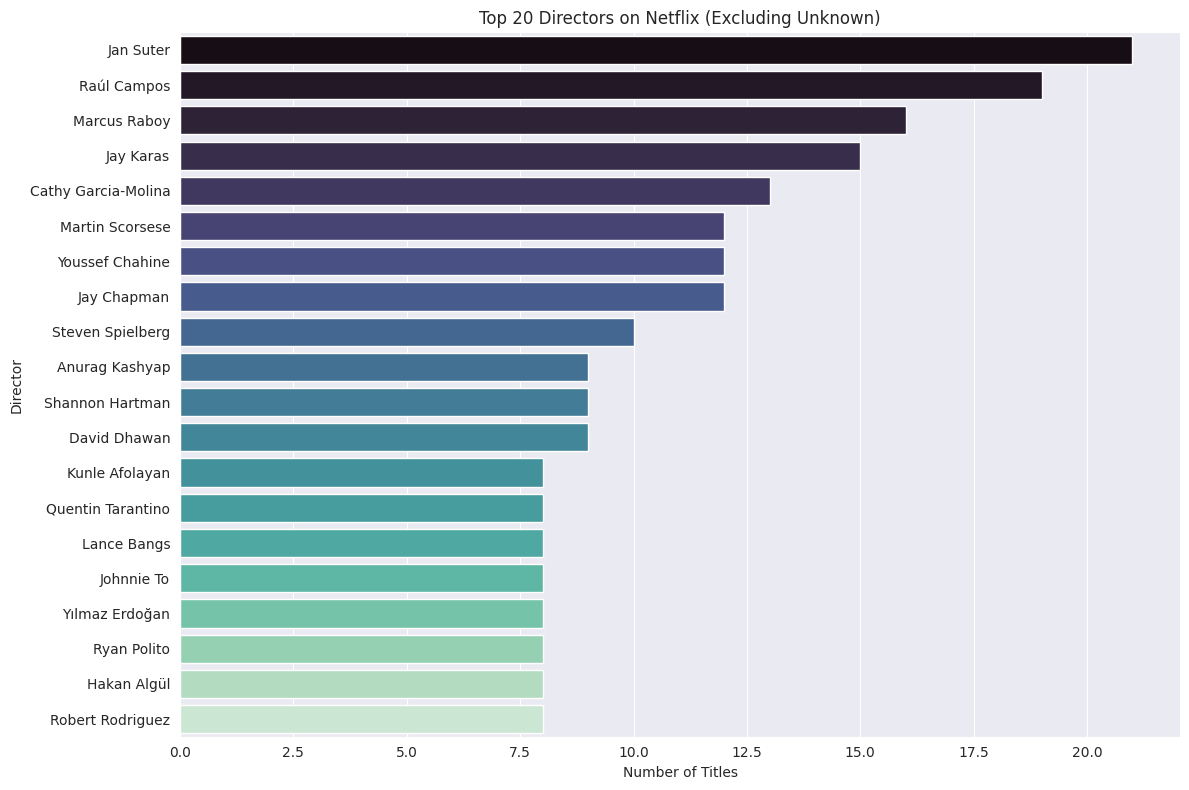

In [266]:
plt.figure(figsize=(12, 8))
sns.barplot(
    y='director',
    x='count',
    data=top_directors,
    palette='mako',
    hue='director',
)
plt.title('Top 20 Directors on Netflix (Excluding Unknown)')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show()
